**Logistic regression - Marco Patiño and Armando Rodríguez**

In [1]:
!pip install --upgrade --quiet eli5 

     |████████████████████████████████| 106 kB 8.5 MB/s 


In [2]:
import pandas as pd
import numpy as np
import eli5
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn import preprocessing, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, classification_report

### Dataset

In [ ]:
random_state=10000

In [ ]:
df = pd.read_csv('botNoBot2018_preprocessed.csv',lineterminator='\n')
df.shape

(10991, 13)

In [ ]:
Y = df["category"]
X = df.drop(columns="category", axis=1);
X.describe()

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, train_size=0.8, shuffle=True, stratify=Y, random_state=random_state);

In [ ]:
scaler = preprocessing.Normalizer('max').fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

### Model 

In [ ]:
penalties = ['l1', 'l2', 'elasticnet']
cs = [1,5,10,15]
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

lr = LogisticRegression(max_iter=100000)
lr = GridSearchCV(estimator=lr, scoring='accuracy', cv = 5, param_grid={'penalty': penalties, 'C': cs, 'solver': solvers }, verbose=10) 
lr.fit(Xtrain,Ytrain.values.ravel())

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5; 1/60] START C=1, penalty=l1, solver=newton-cg..........................
[CV 1/5; 1/60] END C=1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5; 1/60] START C=1, penalty=l1, solver=newton-cg..........................
[CV 2/5; 1/60] END C=1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5; 1/60] START C=1, penalty=l1, solver=newton-cg..........................
[CV 3/5; 1/60] END C=1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5; 1/60] START C=1, penalty=l1, solver=newton-cg..........................
[CV 4/5; 1/60] END C=1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5; 1/60] START C=1, penalty=l1, solver=newton-cg..........................
[CV 5/5; 1/60] END C=1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5; 2/60] START C=1, penalty=l1, solver=lbfgs..............................
[CV 1/5; 2/60] END .C=1, penalty

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
160 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solv

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=100000),
             param_grid={'C': [1, 5, 10, 15],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy', verbose=10)

In [ ]:
lr.best_params_ , lr.best_score_

({'C': 5, 'penalty': 'l2', 'solver': 'newton-cg'}, 0.7733177204702486)

### Interpretability

In [ ]:
print(classification_report(lr.predict(Xtest), Ytest, target_names=['human', 'bot']))

              precision    recall  f1-score   support

       human       0.78      0.75      0.77      1116
         bot       0.75      0.78      0.77      1083

    accuracy                           0.77      2199
   macro avg       0.77      0.77      0.77      2199
weighted avg       0.77      0.77      0.77      2199



In [ ]:
pred = lr.predict(Xtest)
print("\nAccuracy on test set: ", metrics.accuracy_score(Ytest, pred))


Accuracy on test set:  0.7671668940427467


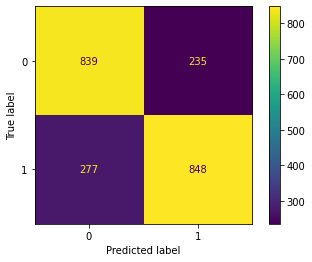

In [ ]:
ConfusionMatrixDisplay.from_estimator(lr, Xtest,Ytest)

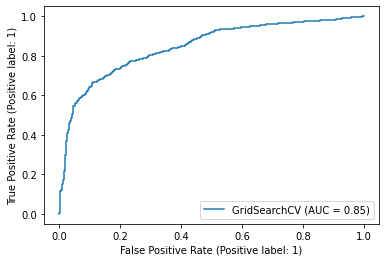

In [ ]:
RocCurveDisplay.from_estimator(lr, Xtest,Ytest, pos_label=1)

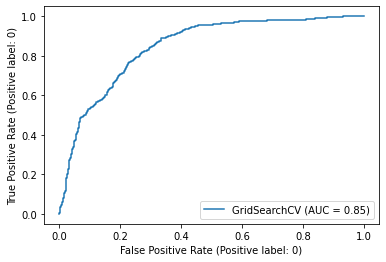

In [ ]:
RocCurveDisplay.from_estimator(lr, Xtest,Ytest, pos_label=0)

In [ ]:
eli5.sklearn.explain_linear_classifier_weights(lr.best_estimator_,top=13,feature_names=list(X.columns),target_names=['human', 'bot'])

Explanation(estimator="LogisticRegression(C=5, max_iter=100000, solver='newton-cg')", description="\nFeatures with largest coefficients.\nCaveats:\n1. Be careful with features which are not\n   independent - weights don't show their importance.\n2. If scale of input features is different then scale of coefficients\n   will also be different, making direct comparison between coefficient values\n   incorrect.\n3. Depending on regularization, rare features sometimes may have high\n   coefficients; this doesn't mean they contribute much to the\n   classification result for most examples.\n", error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target='bot', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='statuses_count', weight=2.5147471205637264, std=None, value=None), FeatureWeight(feature='favourites_count', weight=2.2958773114408073, std=None, value=None), FeatureWeight(feature='profile_age', weight=1.0659970101942353, std=None, value=None), FeatureWeight(feature='default_profile', weight=0.5550992487847918, std=None, value=None), FeatureWeight(feature='friends_rate', weight=0.36209235882368856, std=None, value=None), FeatureWeight(feature='profile_use_background_image', weight=0.008113368412259474, std=None, value=None)], neg=[FeatureWeight(feature='favourites_age_rate', weight=-20.0143248757829, std=None, value=None), FeatureWeight(feature='statuses_age_rate', weight=-18.8580333916233, std=None, value=None), FeatureWeight(feature='followers_count', weight=-10.21606471146457, std=None, value=None), FeatureWeight(feature='<BIAS>', weight=-2.6192680381674913, std=None, value=None), FeatureWeight(feature='listed_count', weight=-0.9181882947732956, std=None, value=None), FeatureWeight(feature='geo_enabled', weight=-0.41698604265479355, std=None, value=None), FeatureWeight(feature='friends_count', weight=-0.060862254048477435, std=None, value=None)], pos_remaining=0, neg_remaining=0), proba=None, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [ ]:
scores = cross_val_score(lr.best_estimator_, Xtrain,Ytrain.values.ravel(), cv=5)
score = np.mean(scores) 
print("Cross validation scores:", scores)
print("Cross validation mean score:", score)

Cross validation scores: [0.76805003 0.76918704 0.78270762 0.7701934  0.77645051]
Cross validation mean score: 0.7733177204702486


### Explanation of some examples.

We will take two extreme examples and one missclasificated example.  Example 8089 has 0 followers while 6666 has 1M followers. Then example 3010 is classified as a bot but is a human. 

In [ ]:
Xtransformed = scaler.transform(X)
Xtransformed = pd.DataFrame(Xtransformed, columns=X.columns)

In [ ]:
extremeBig = Xtransformed.iloc[6666]
extremeSmall =  Xtransformed.iloc[8089]
missClassified = Xtransformed.iloc[3010]

followers_count                 0.000000e+00
friends_count                   0.000000e+00
listed_count                    0.000000e+00
favourites_count                1.208624e-03
geo_enabled                     0.000000e+00
statuses_count                  2.471636e-01
profile_use_background_image    6.043120e-04
default_profile                 6.043120e-04
profile_age                     1.000000e+00
statuses_age_rate               1.493639e-04
favourites_age_rate             7.303859e-07
friends_rate                    0.000000e+00
Name: 8089, dtype: float64


#### Extremely low example.

In [ ]:
eli5.sklearn.explain_prediction_linear_classifier(lr.best_estimator_,extremeSmall,top=13)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Explanation(estimator="LogisticRegression(C=5, max_iter=100000, solver='newton-cg')", description=None, error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target=0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=2.6192680381674913, std=None, value=1.0), FeatureWeight(feature='statuses_age_rate', weight=0.0028167097949098755, std=None, value=0.00014936392021455705), FeatureWeight(feature='favourites_age_rate', weight=1.4618181045939662e-05, std=None, value=7.303859179195942e-07)], neg=[FeatureWeight(feature='profile_age', weight=-1.0659970101942353, std=None, value=1.0), FeatureWeight(feature='statuses_count', weight=-0.6215539422653963, std=None, value=0.24716359636433888), FeatureWeight(feature='favourites_count', weight=-0.002774852289031781, std=None, value=0.0012086239431019015), FeatureWeight(feature='default_profile', weight=-0.0003354531214395892, std=None, value=0.0006043119715509508), FeatureWeight(feature='profile_use_background_image', weight=-4.90300566113173e-06, std=None, value=0.0006043119715509508)], pos_remaining=0, neg_remaining=0), proba=0.7173659612876058, score=-0.931433205267683, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [ ]:
X.iloc[8089]

followers_count                    0.000000
friends_count                      0.000000
listed_count                       0.000000
favourites_count                   2.000000
geo_enabled                        0.000000
statuses_count                   409.000000
profile_use_background_image       1.000000
default_profile                    1.000000
profile_age                     1654.774433
statuses_age_rate                  0.247164
favourites_age_rate                0.001209
friends_rate                       0.000000
Name: 8089, dtype: float64

In [ ]:
Y.loc[8089], lr.predict([Xtransformed.iloc[8089]])

(0, array([0]))

#### Extremely high example.

In [ ]:
eli5.sklearn.explain_prediction_linear_classifier(lr.best_estimator_,extremeBig,top=13)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Explanation(estimator="LogisticRegression(C=5, max_iter=100000, solver='newton-cg')", description=None, error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target=0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='followers_count', weight=10.21606471146457, std=None, value=1.0), FeatureWeight(feature='<BIAS>', weight=2.6192680381674913, std=None, value=1.0), FeatureWeight(feature='statuses_age_rate', weight=0.09792236373369077, std=None, value=0.0051926073997295855), FeatureWeight(feature='listed_count', weight=0.005743626338917073, std=None, value=0.006255390502810971), FeatureWeight(feature='favourites_age_rate', weight=0.001444512492088309, std=None, value=7.217393047497456e-05), FeatureWeight(feature='friends_count', weight=0.00033358274826734735, std=None, value=0.005480946335008315), FeatureWeight(feature='geo_enabled', weight=2.8679610016795233e-07, std=None, value=6.877834527554669e-07)], neg=[FeatureWeight(feature='statuses_count', weight=-0.16973270941933244, std=None, value=0.06749494135270498), FeatureWeight(feature='favourites_count', weight=-0.0021538466028348103, std=None, value=0.0009381366295584568), FeatureWeight(feature='profile_age', weight=-9.53001196825715e-06, std=None, value=8.939998777783332e-06), FeatureWeight(feature='profile_use_background_image', weight=-5.580240540060962e-09, std=None, value=6.877834527554669e-07), FeatureWeight(feature='friends_rate', weight=-1.357540477407518e-09, std=None, value=3.749155275791216e-09)], pos_remaining=0, neg_remaining=0), proba=0.9999971519724096, score=-12.768881028769208, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [ ]:
X.iloc[6666]

followers_count                 1.453946e+06
friends_count                   7.969000e+03
listed_count                    9.095000e+03
favourites_count                1.364000e+03
geo_enabled                     1.000000e+00
statuses_count                  9.813400e+04
profile_use_background_image    1.000000e+00
default_profile                 0.000000e+00
profile_age                     1.299828e+01
statuses_age_rate               7.549771e+03
favourites_age_rate             1.049370e+02
friends_rate                    5.451069e-03
Name: 6666, dtype: float64

In [ ]:
Y.loc[6666], lr.predict([Xtransformed.iloc[6666]])

(0, array([0]))

#### Miss predicted

In [ ]:
eli5.sklearn.explain_prediction_linear_classifier(lr.best_estimator_,Xtransformed.iloc[3010],top=13)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Explanation(estimator="LogisticRegression(C=5, max_iter=100000, solver='newton-cg')", description=None, error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target=1, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='statuses_count', weight=2.5147471205637264, std=None, value=1.0), FeatureWeight(feature='favourites_count', weight=0.6768870477479161, std=None, value=0.29482718626768734), FeatureWeight(feature='profile_age', weight=0.15948223991981697, std=None, value=0.1496085245968539), FeatureWeight(feature='default_profile', weight=0.00012876345367311337, std=None, value=0.00023196474135931338), FeatureWeight(feature='friends_rate', weight=5.4228271010882725e-05, std=None, value=0.00014976364369314894), FeatureWeight(feature='profile_use_background_image', weight=1.882015405302592e-06, std=None, value=0.00023196474135931338)], neg=[FeatureWeight(feature='<BIAS>', weight=-2.6192680381674913, std=None, value=1.0), FeatureWeight(feature='followers_count', weight=-0.17299297702085678, std=None, value=0.016933426119229877), FeatureWeight(feature='statuses_age_rate', weight=-0.029238967833021358, std=None, value=0.001550478102664154), FeatureWeight(feature='favourites_age_rate', weight=-0.009149010159135811, std=None, value=0.00045712309637813495), FeatureWeight(feature='friends_count', weight=-0.0018776803035136856, std=None, value=0.03085131060078868), FeatureWeight(feature='listed_count', weight=-0.0012779238618974191, std=None, value=0.0013917884481558804)], pos_remaining=0, neg_remaining=0), proba=0.6265622213861051, score=0.517496684625633, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [ ]:
X.iloc[3010]

followers_count                   73.000000
friends_count                    133.000000
listed_count                       6.000000
favourites_count                1271.000000
geo_enabled                        0.000000
statuses_count                  4311.000000
profile_use_background_image       1.000000
default_profile                    1.000000
profile_age                      644.962350
statuses_age_rate                  6.684111
favourites_age_rate                1.970658
friends_rate                       0.645631
Name: 3010, dtype: float64

In [ ]:
Y.loc[3010], lr.predict([Xtransformed.iloc[3010]])

(0, array([1]))